In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Discussion: Week 3

In [2]:
# Import the Pandas module
import pandas as pd


## Exercise: Statistics on Cross-Country Income per Capita

Objectives:

1. Import and manage cross-country GDP per capita data
2. Construct plots using imported data

For this exercise, we'll make use of a file called `crossCountryIncomePerCapita.csv` from: https://www.briancjenkins.com/data/csv/crossCountryIncomePerCapita.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data).

### Part (a): Import Data and Inspect the `DataFrame`

In the first part of the exercise, you will import the dataset and use some basic Pandas operations to explore some properties of the `DataFrame` that you create. The csv file that you import has years in the leftmost column. Pass the optional argument `parse_dates=True` to `pd.read_csv()` so that Pandas interprets the year numbers as dates. This is handy for graphing, among other things.

In [3]:
# Import the cross-country GDP data into a DataFrame called 'incomeDf' with arguments index_col=0 and parse_dates=True
incomeDf = pd.read_csv('https://www.briancjenkins.com/data/csv/crossCountryIncomePerCapita.csv',index_col=0,parse_dates=True)

# Print the first five rows of incomeDf
print(incomeDf.head())

            Argentina - ARG  Australia - AUS  Austria - AUT  Burundi - BDI  \
year                                                                         
1960-01-01       3154.70256      14182.87949     9362.05963      609.70310   
1961-01-01       3260.68442      14138.77235     9873.34963      516.61365   
1962-01-01       3059.14118      14638.65153    10093.59272      548.91431   
1963-01-01       2975.31498      15565.82957    10458.43311      553.84916   
1964-01-01       3118.35913      15924.63763    10884.63259      553.39789   

            Belgium - BEL  Benin - BEN  Burkina Faso - BFA  Bangladesh - BGD  \
year                                                                           
1960-01-01    10349.61476   1438.39447           660.64124        1498.06531   
1961-01-01    10741.32217   1447.91880           648.61702        1482.04660   
1962-01-01    11211.53601   1363.54825           697.15829        1546.08176   
1963-01-01    11485.03254   1394.36188           667.

In [4]:
# Print the columns attribute of incomeDf
print(incomeDf.columns)

Index(['Argentina - ARG', 'Australia - AUS', 'Austria - AUT', 'Burundi - BDI',
       'Belgium - BEL', 'Benin - BEN', 'Burkina Faso - BFA',
       'Bangladesh - BGD', 'Bolivia (Plurinational State of) - BOL',
       'Brazil - BRA',
       ...
       'Turkey - TUR', 'Taiwan - TWN', 'U.R. of Tanzania: Mainland - TZA',
       'Uganda - UGA', 'Uruguay - URY', 'United States - USA',
       'Venezuela (Bolivarian Republic of) - VEN', 'South Africa - ZAF',
       'Zambia - ZMB', 'Zimbabwe - ZWE'],
      dtype='object', length=111)


The `len()` function is a built-in Python function for determining the length of objects that can be iterated upone (e.g., lists, strings, NumPy arrays). For example, the following code creates a variable `x` equal to a four-element list and prints the length of `x`:

    x = [1,2,3,4]
    print(len(x))
    
The code will print a value of 4 to the screen.

In [5]:
# Print the number of years of countries in incomeDf (i.e., print the length of incomeDf.columns)
print(len(incomeDf.columns))

111


In [6]:
# Print the index attribute of incomeDf
print(incomeDf.index)

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype

In [7]:
# Print the number of years of data in incomeDf (i.e., print the length of incomeDf.index)
print(len(incomeDf.index))

55


In [8]:
# Print the first five rows of the 'United States - USA 'column of incomeDf
print(incomeDf['United States - USA'].head())

year
1960-01-01    17646.77201
1961-01-01    17795.44201
1962-01-01    18561.17772
1963-01-01    19055.60794
1964-01-01    19856.38345
Name: United States - USA, dtype: float64


In [9]:
# Print the last five rows of the 'United States - USA' column of incomeDf
print(incomeDf['United States - USA'].tail())

year
2010-01-01    49430.86782
2011-01-01    49908.57144
2012-01-01    50657.25890
2013-01-01    51004.73025
2014-01-01    51982.96450
Name: United States - USA, dtype: float64


In [10]:
# Print the last value in the 'United States - USA' column of incomeDf
print('GDP per capital for the US in '+str(incomeDf.index[-1])[:4]+':',round(incomeDf.iloc[-1]['United States - USA']))

GDP per capital for the US in 2014: 51983.0


### Part (b): Construct Two Plots

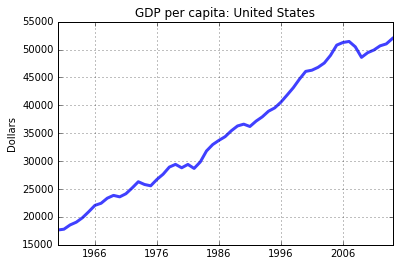

In [11]:
# Create a plot of gdp per capita for the US with incomeDf.index as the x-axis coordinates with:
#     1. Set linewidth to 3 and opacity (alpha) to 0.75
#     2. Set y-axis label to 'Dollars'
#     3. Set title to 'GDP per capita: United States')
#     4. Add a grid if you want to
plt.plot(incomeDf.index,incomeDf['United States - USA'],lw=3,alpha = 0.75)
plt.ylabel('Dollars')
plt.title('GDP per capita: United States')
plt.grid()

You can use the `DataFrame` method `filter()` to exclude columns or rows that *don't* match specified criteria. This is useful for searching over columns (or rows) if you're not sure about the contents. For example, suppose that we want to select the column for Equatorial Guinea from `incomeDf`, but we're not sure what the abbreviation is. We can run:

    incomeDf.filter(like='Guinea').columns
    
which returns:

    Index(['Guinea - GIN', 'Guinea-Bissau - GNB', 'Equatorial Guinea - GNQ'], dtype='object')
    
So now it's apparent that `'Equatorial Guinea - GNQ'` is the name of the column with data for Equatorial Guinea.

In [12]:
# Use the example described above to find the column name for any country you like
country = incomeDf.filter(like='Bolivia').columns.values[0]
print(country)

Bolivia (Plurinational State of) - BOL


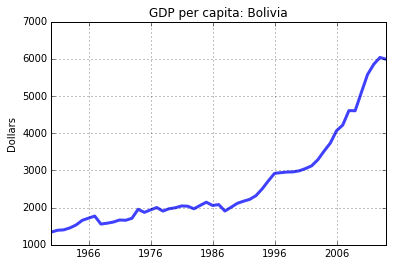

In [13]:
# Create a plot of gdp per capita for the country that you picked wtih incomeDf.index as the x-axis coordinates and:
#     1. Set linewidth to 3 and opacity (alpha) to 0.75
#     2. Set y-axis label to 'Dollars'
#     3. Set title to 'GDP per capita: COUNTRY NAME')
#     4. Add a grid if you want to
plt.plot(incomeDf.index,incomeDf[country],lw=3,alpha = 0.75)
plt.ylabel('Dollars')
plt.title('GDP per capita: '+country.split(" ")[0])
plt.grid()

**Question**

1. Describe in words any similarities and/or differences you see between the paths of GDP per capita in the US and GDP per capita in the country that you picked.

**Answer**

1. Over the entire data range, the GDP per capita of Bolivia is at least an order of magnitude lower than the GDP per capita of the US. However, beginning in the early 2000s, growth in GDP per capita in Bolivia accelerated substantially and this was not mirrored in the US data.<!-- answer -->